# The Sparks Foundation Internship
# Name: Ishan Padhy
## TASK-1

## Tasks:-

#### Data Set:- https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv


In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

#### Gathering the data

In [2]:
url = r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
student_data = pd.read_csv(url)
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Analyzing the data

In [3]:
student_data.shape

(25, 2)

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


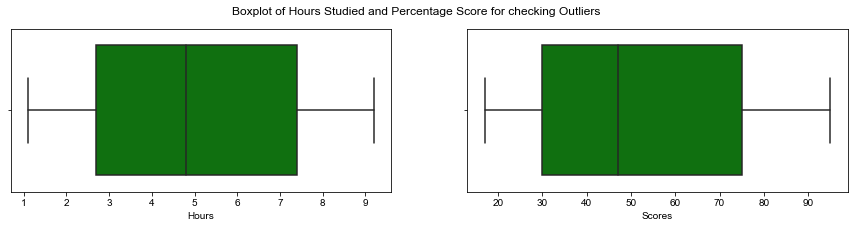

In [6]:
# Checking if there are any Outliers in the data with the help of Boxplot
fig, axes = plt.subplots(1,2, figsize = (15, 3))
fig.suptitle("Boxplot of Hours Studied and Percentage Score for checking Outliers")
sns.set_style('whitegrid')
sns.boxplot(ax = axes[0], x = student_data['Hours'], color = 'green')
sns.boxplot(ax = axes[1], x = student_data['Scores'], color = 'green')
plt.show()

<AxesSubplot:>

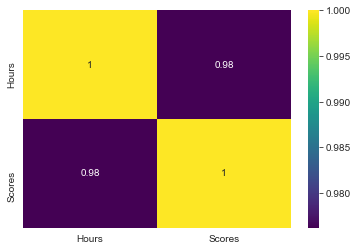

In [7]:
correlation = student_data.corr()
sns.heatmap(correlation, annot = True, cmap = "viridis")

#### The correlation between Scores and Hours is 0.98

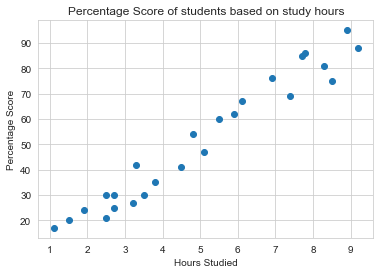

In [8]:
plt.scatter(student_data['Hours'], student_data['Scores'])
plt.title("Percentage Score of students based on study hours")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### We can see that the percentage increases with the increase in Hours studied.

#### Prepaing the data for creating a model

In [9]:
x = student_data["Hours"].values.reshape(-1,1) 
y = student_data["Scores"].values.reshape(-1,1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("----Shape of Datasets----")
print("Training Set X : ", x_train.shape)
print("Training Set Y : ", y_train.shape)
print("Test Set X     : ", x_test.shape)
print("Test Set Y     : ", y_test.shape)

----Shape of Datasets----
Training Set X :  (20, 1)
Training Set Y :  (20, 1)
Test Set X     :  (5, 1)
Test Set Y     :  (5, 1)


#### MODEL 

In [11]:
model =  LinearRegression()
print("Simple Linear Regression Model created.")

Simple Linear Regression Model created.


In [12]:
model.fit(x_train, y_train)
print("Training completed.\n")

print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Training completed.

Coefficient:  [[9.91065648]]
Intercept:  [2.01816004]


#### Model Visualization

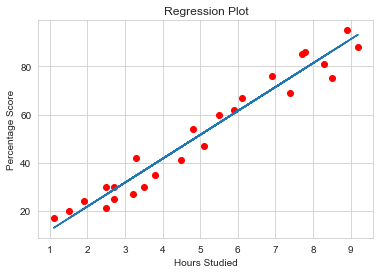

In [13]:
line = (model.coef_*x) + model.intercept_  
# Plotting for the test data
plt.scatter(x, y, c = "Red")
plt.plot(x, line)
plt.title('Regression Plot')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Prediction of data

In [14]:
y_predicted = model.predict(x_test)
print(y_predicted)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


#### Model Evaluation

In [15]:
df = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_predicted.ravel()})  
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [16]:
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_predicted))
print("R2_score : ", r2_score(y_test, y_predicted))

Mean Absolute Error :  4.183859899002975
R2_score :  0.9454906892105356


#### PREDICTION 

In [17]:
# Predicting Percentage score if a student studies for 9.25 hrs/day
hour = np.array([9.25]).reshape(-1,1)
percentage = model.predict(hour)
percentage = np.round(percentage, decimals = 1)
print(percentage)

[[93.7]]


### Therefore, if the student studies for 9.25 hrs/day, they will get 93.7%